In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from scipy import stats



In [6]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [7]:
# Cargar el dataset
df = pd.read_csv('youtube.csv', encoding='ISO-8859-1')
df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Youtuber     1000 non-null   object 
 2   Subscribers  1000 non-null   int64  
 3   Video Views  1000 non-null   float64
 4   Video Count  1000 non-null   int64  
 5   Category     957 non-null    object 
 6   Started      1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [9]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.662430e+07,1.330133e+10,12461.279000,2013.604000
std,288.819436,2.006768e+07,1.604180e+10,43098.754912,4.609168
min,1.000000,1.450000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.670000e+07,5.272817e+09,518.500000,2011.000000
50%,500.500000,2.080000e+07,9.790981e+09,1242.000000,2014.000000
75%,750.250000,2.927500e+07,1.626453e+10,3981.000000,2017.000000
max,1000.000000,2.840000e+08,2.586240e+11,386195.000000,2024.000000


In [10]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 1000 filas y 7 columnas


In [11]:
print(df.isnull().sum())

Rank            0
Youtuber        0
Subscribers     0
Video Views     0
Video Count     0
Category       43
Started         0
dtype: int64


In [12]:
# Contar valores nulos
null_counts = df.isnull().sum()

# Calcular el porcentaje de valores nulos
null_percentage = (null_counts / len(df)) * 100

# Mostrar el resultado
print(pd.DataFrame({"Valores Nulos": null_counts, "Porcentaje (%)": null_percentage}))


             Valores Nulos  Porcentaje (%)
Rank                     0             0.0
Youtuber                 0             0.0
Subscribers              0             0.0
Video Views              0             0.0
Video Count              0             0.0
Category                43             4.3
Started                  0             0.0


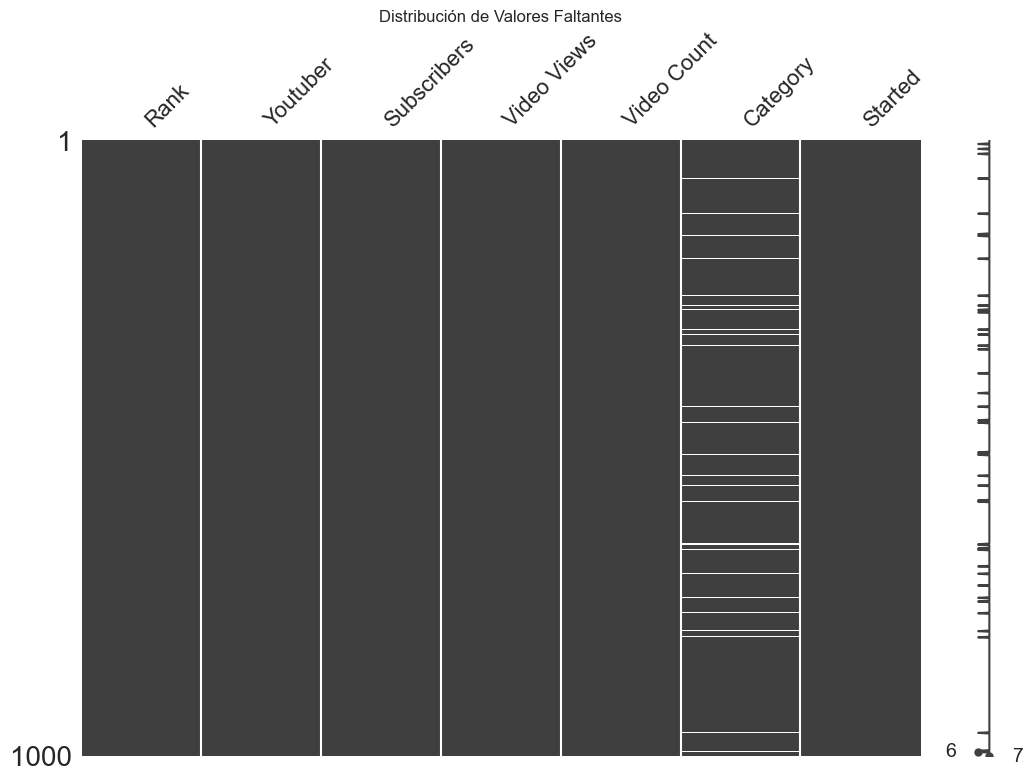

In [13]:
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()

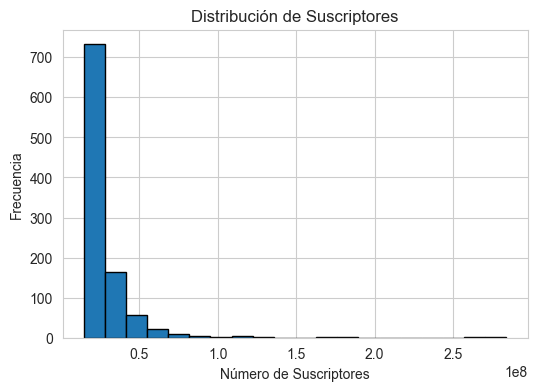

In [14]:
import matplotlib.pyplot as plt

# Histograma de suscriptores
plt.hist(df["Subscribers"], bins=20, edgecolor="black")
plt.xlabel("Número de Suscriptores")
plt.ylabel("Frecuencia")
plt.title("Distribución de Suscriptores")
plt.show()


In [15]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Rank           0.0
Youtuber       0.0
Subscribers    0.0
Video Views    0.0
Video Count    0.0
Category       4.3
Started        0.0
dtype: float64

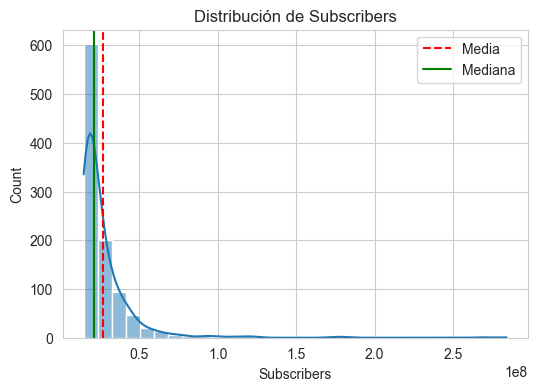

In [16]:
sns.histplot(df["Subscribers"], kde=True, bins=30)
plt.title("Distribución de Subscribers")
plt.axvline(df["Subscribers"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["Subscribers"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

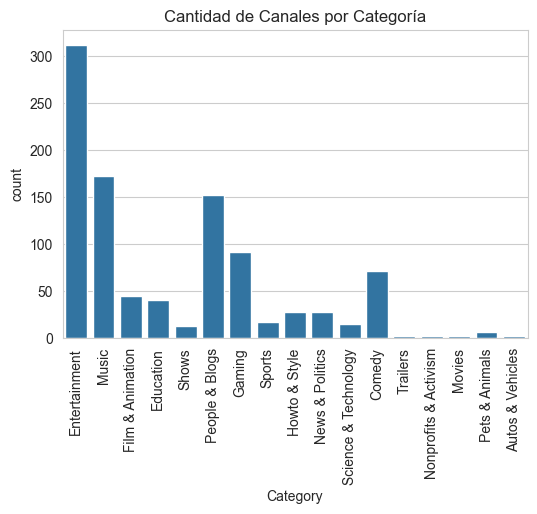

In [47]:
sns.countplot(x="Category", data=df)
plt.title("Cantidad de Canales por Categoría")
plt.xticks(rotation=90)
plt.show()

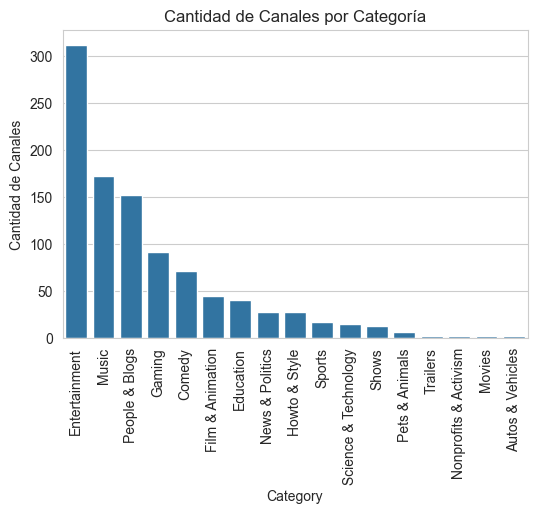

In [44]:
# Contar categorías
category_counts = df["Category"].value_counts()

sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Cantidad de Canales")
plt.title("Cantidad de Canales por Categoría")
plt.show()


#### Data-Cleaning

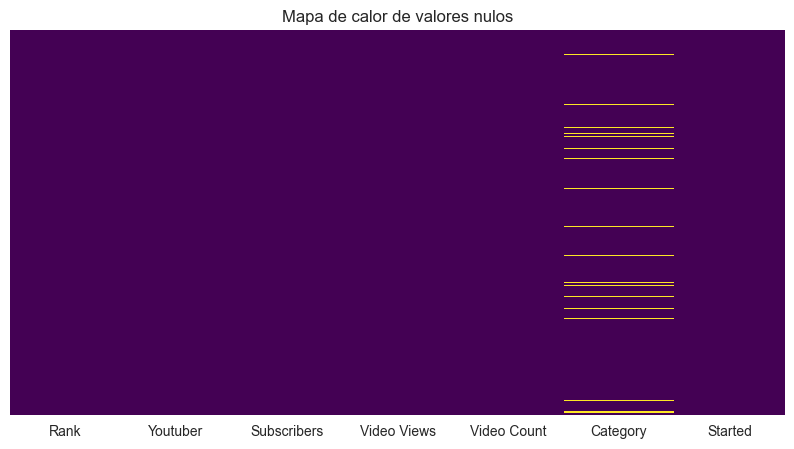

In [29]:
plt.figure(figsize=(10, 5))
# Mapa de calor de valores nulos
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
# Título del gráfico
plt.title("Mapa de calor de valores nulos")
plt.show()


In [31]:
categoria_moda = df["Category"].mode()[0]
df["Category"].fillna(categoria_moda, inplace=True)

null_counts_after = df.isnull().sum()
null_counts_after

Rank           0
Youtuber       0
Subscribers    0
Video Views    0
Video Count    0
Category       0
Started        0
dtype: int64

In [34]:
top_10_youtubers = df[df["Rank"] <= 10][["Youtuber", "Video Count", "Started"]]
print(top_10_youtubers)

                     Youtuber  Video Count  Started
0                     MrBeast          803     2012
1                    T-Series        21237     2006
2              YouTube Movies            0     2015
3  Cocomelon - Nursery Rhymes         1188     2006
4                   SET India       139720     2006
5           ? Kids Diana Show         1230     2015
6                       Music            0     2013
7               Vlad and Niki          730     2018
8                 Like Nastya          886     2016
9                   PewDiePie         4767     2010


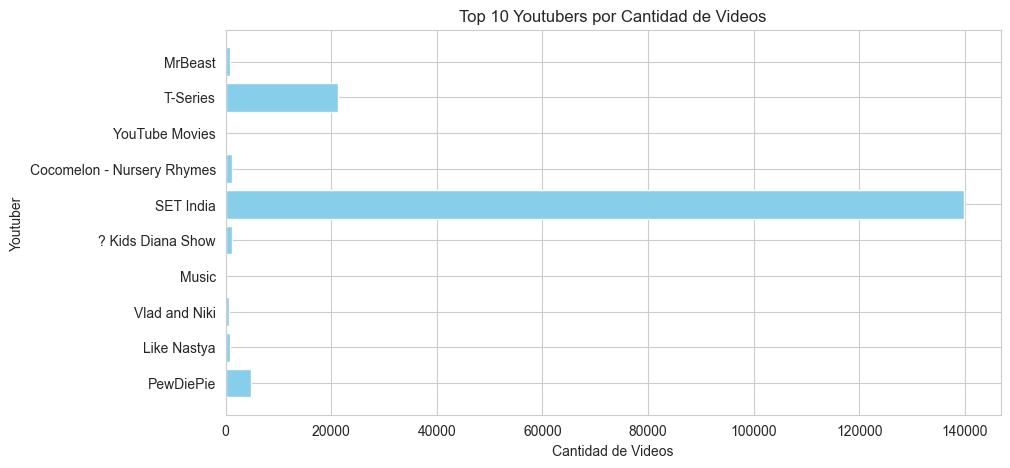

In [37]:
plt.figure(figsize=(10, 5))
plt.barh(top_10_youtubers["Youtuber"], top_10_youtubers["Video Count"], color='skyblue')
plt.xlabel("Cantidad de Videos")
plt.ylabel("Youtuber")
plt.title("Top 10 Youtubers por Cantidad de Videos")
plt.gca().invert_yaxis()
plt.show()

In [38]:
top_10_youtubers.to_csv("top_10_youtubers.csv", index=False)

In [40]:
# Año actual
year_now = 2025
# Calcular los años activos
top_10_youtubers["Años Activos"] = year_now - top_10_youtubers["Started"]

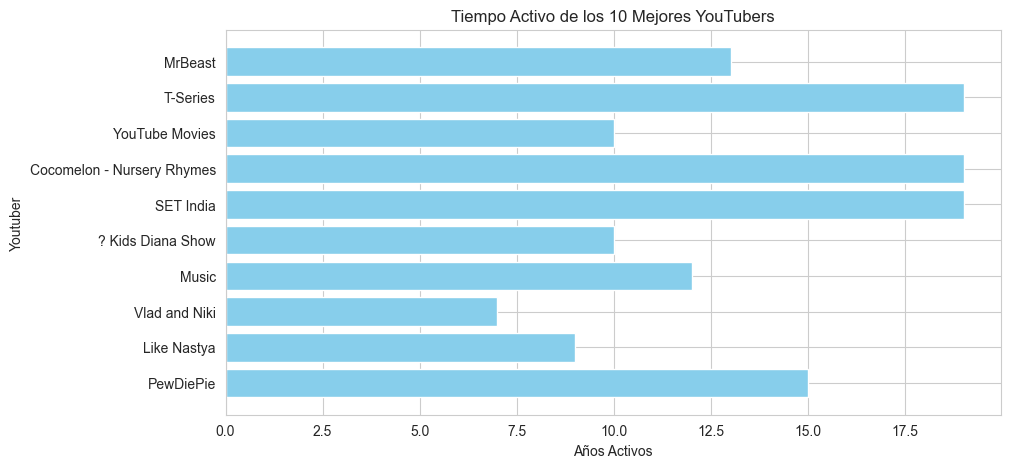

In [41]:
# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(top_10_youtubers["Youtuber"], top_10_youtubers["Años Activos"], color="skyblue")
plt.xlabel("Años Activos")
plt.ylabel("Youtuber")
plt.title("Tiempo Activo de los 10 Mejores YouTubers")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el top 1 esté arriba
plt.show()